In [5]:
%matplotlib inline

# import packages
import numpy as np
import time
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib import gridspec


In [6]:
# define plot properties
from cycler import cycler
import matplotlib.cm as cm

from matplotlib import rcParams
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.animation as animation

def rgb(r,g,b):
    return (float(r)/256.,float(g)/256.,float(b)/256.)

cb2 = [rgb(31,120,180), rgb(255,127,0), rgb(51,160,44), rgb(227,26,28), \
       rgb(166,206,227), rgb(253,191,111), rgb(178,223,138), rgb(251,154,153)]

rcParams['figure.figsize'] = (9,7.5)
rcParams['figure.dpi'] = 300

rcParams['lines.linewidth'] = 1

rcParams['axes.prop_cycle'] = cycler('color', cb2)
rcParams['axes.facecolor'] = 'white'
rcParams['axes.grid'] = False

rcParams['patch.facecolor'] = cb2[0]
rcParams['patch.edgecolor'] = 'white'

#rcParams['font.family'] = 'Bitstream Vera Sans' 
rcParams['font.size'] = 23
#rcParams['font.weight'] = 300


> Make image with delta spikes.

In [3]:
# make image
#image = np.zeros((1,256,256))
#image[np.random.uniform(size=(1,256,256)) < 0.3] = 1.
image = np.random.rand(256,256)<0.05

np.save("poisson_process_image.npy", image)

> Investigate results.

FileNotFoundError: [Errno 2] No such file or directory: '../delta_recovery.npy'

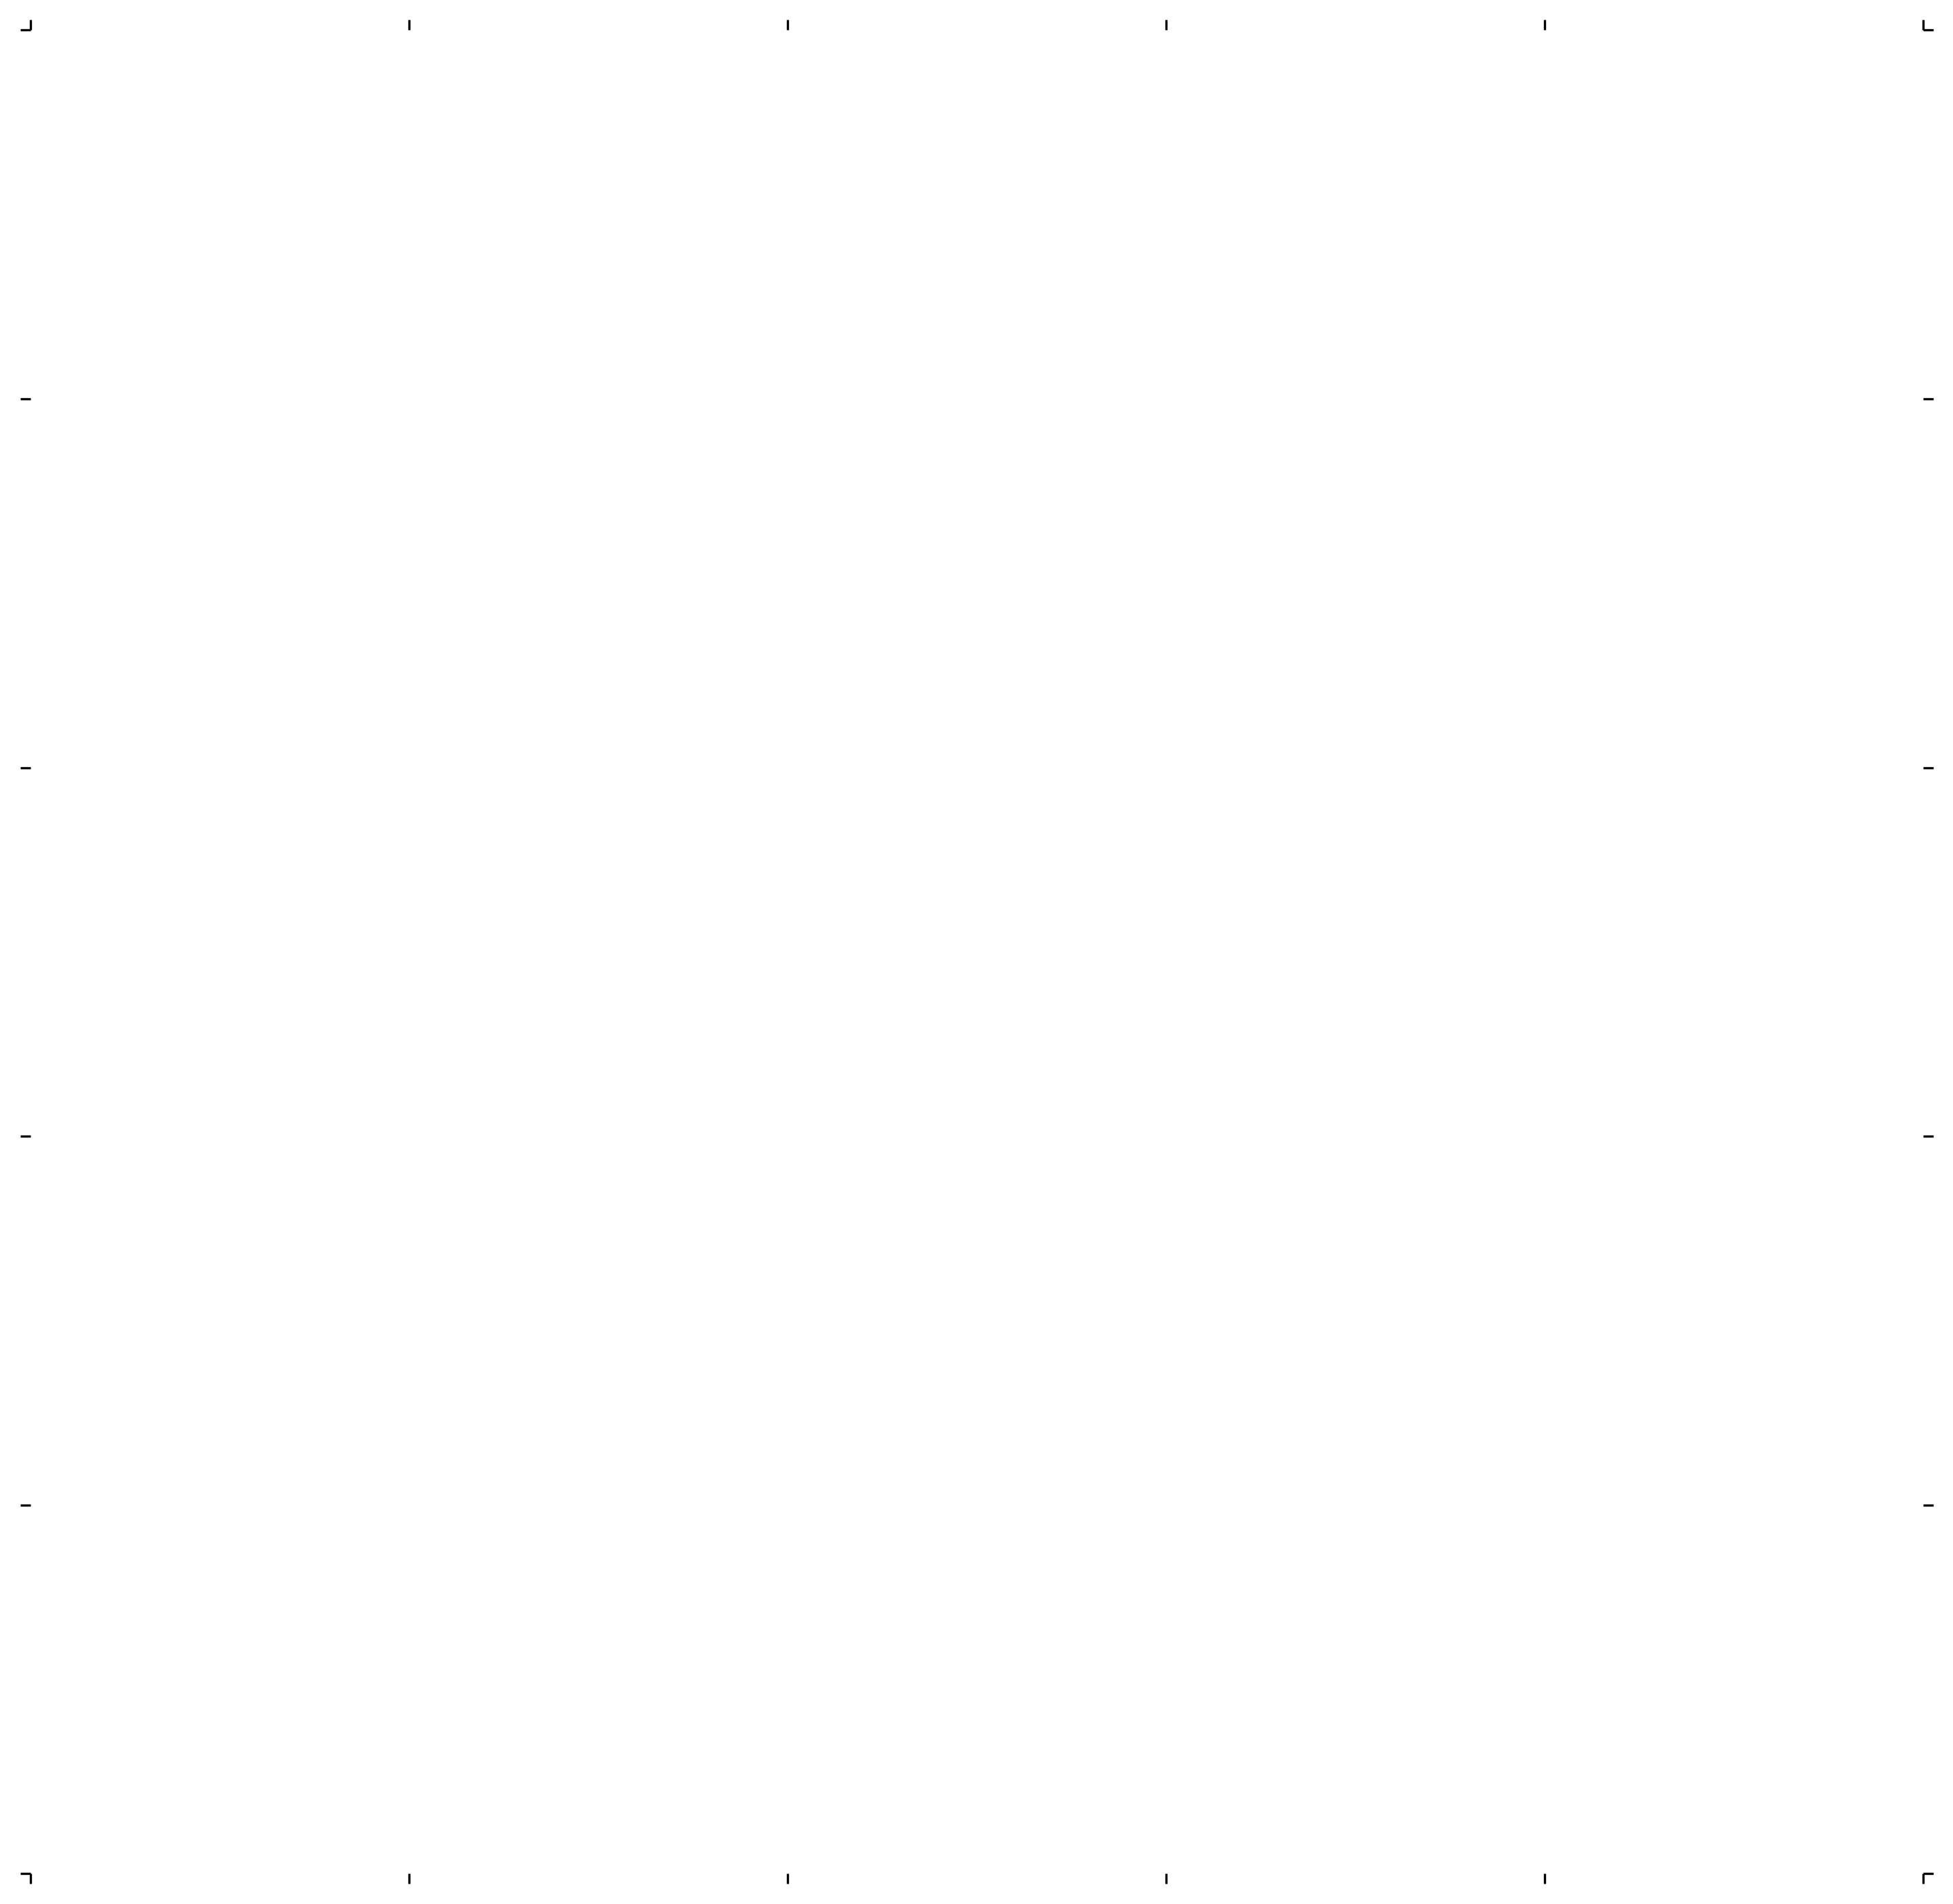

In [4]:
# initiate the plot
fig = plt.figure(figsize=[12,12]);
matplotlib.rcParams['axes.linewidth'] = 1.

# combine subplots
ax = fig.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

#image = np.load("poisson_process_image.npy").reshape(256,256)
image = np.load("../delta_recovery.npy").reshape(256,256)
plt.imshow(image, vmin=-0.0, vmax=1.)

plt.tight_layout()


> Invextigate flux PDF.

In [ ]:
image = np.load("poisson_process_image.npy")
plt.hist(image.ravel(), alpha=0.5, range=[-0.5,2], bins=20, normed=True);

image = np.load("../delta_recovery.npy")
plt.hist(image.ravel(), alpha=0.5, range=[-0.5,2], bins=20, normed=True);

plt.ylabel("Number of pixels")
plt.xlabel("Flux value")

> Illustrate weak lensing data.

In [ ]:
def get_random_data(target, M, N, mode='image'):
    '''
    get a gaussian random field with the same power spectrum as the image 'target' (in the 'image' mode),
    or with an assigned power spectrum function 'target' (in the 'func' mode).
    '''
    random_phase = np.random.rand(M//2-1,N-1)
    random_phase_left = np.random.rand(M//2-1)[:,None]
    random_phase_top = np.random.rand(N//2-1)[None,:]
    random_phase_middle = np.random.rand(N//2-1)[None,:]
    random_phase_corners = np.random.randint(0,2,3)/2
    gaussian_phase = np.concatenate((
                      np.concatenate((random_phase_corners[1][None,None],
                                      random_phase_left,
                                      random_phase_corners[2][None,None],
                                      -random_phase_left[::-1,:],
                                    ),axis=0),
                      np.concatenate((np.concatenate((random_phase_top,
                                                      random_phase_corners[0][None,None],
                                                      -random_phase_top[:,::-1],
                                                    ),axis=1),
                                      random_phase,
                                      np.concatenate((random_phase_middle,
                                                      np.array(0)[None,None],
                                                      -random_phase_middle[:,::-1],
                                                    ),axis=1),
                                      -random_phase[::-1,::-1],
                                    ),axis=0),
                                    ),axis=1)


    if mode == 'image':
        gaussian_modulus = np.abs(np.fft.fftshift(np.fft.fft2(target)))
    if mode == 'func':
        X = np.arange(0,M)
        Y = np.arange(0,N)
        Xgrid, Ygrid = np.meshgrid(X,Y)
        gaussian_modulus = target(((Xgrid-M/2)**2+(Ygrid-N/2)**2)**0.5)

    gaussian_field = np.fft.ifft2(np.fft.fftshift(gaussian_modulus*np.exp(1j*2*np.pi*gaussian_phase)))
    data = np.fft.fftshift(np.real(gaussian_field))
    return data



In [ ]:
# initiate the plot
fig = plt.figure(figsize=[12,12]);
matplotlib.rcParams['axes.linewidth'] = 1.

# combine subplots
ax = fig.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

image = np.load("../max_order=2.npy").reshape(512,512)
flux_min = -0.02934368796646595
flux_max = 0.08139952920377262
flux_range = flux_max - flux_min
image = image*flux_range + flux_min
plt.imshow(image, vmin=-0.05, vmax=0.1)

# image = np.load("image_initial.npy")[0,:,:] 
# plt.imshow(image, vmin=-0.05, vmax=0.1)

# image = np.load("image_initial.npy")[0:1,:,:] 
# image_copy = np.copy(image[0])
# image_copy_2 = get_random_data(image[0],512,512).reshape(512,512)
# argsort_1 = np.argsort(image_copy)
# argsort_2 = np.argsort(image_copy_2)
# image_copy_2[argsort_2] = image_copy[argsort_1]
# plt.imshow(image_copy_2, vmin=-0.05, vmax=0.1)

plt.tight_layout()


In [ ]:
# load an initial guess
image = np.load("image_initial.npy")[0:1,:,:]
print(np.percentile(image,1))
print(np.percentile(image,99))
print(np.percentile(image,99)-np.percentile(image,1))

In [ ]:
# load an initial guess
image = np.load("image_initial.npy")[0:1,:,:] 
plt.hist(image.ravel(), alpha=0.5, bins=100, normed=True);

image = np.load("../max_order=2.npy")
flux_min = -0.02934368796646595
flux_max = 0.08139952920377262
flux_range = flux_max - flux_min
image = image*flux_range + flux_min
plt.hist(image.ravel(), alpha=0.5, bins=100, normed=True);

plt.plot([-0.03,-0.03],[0,30])
plt.plot([0.08,0.08],[0,30])
plt.ylabel("Number of pixels")
plt.xlabel("Flux value")

> Calculate power spectrum.

tensor([ 36.2993,  94.4049, 141.1963,  76.6699,  42.9077,  31.7938,  18.9758,
         10.7080,   5.0441,   2.8879])


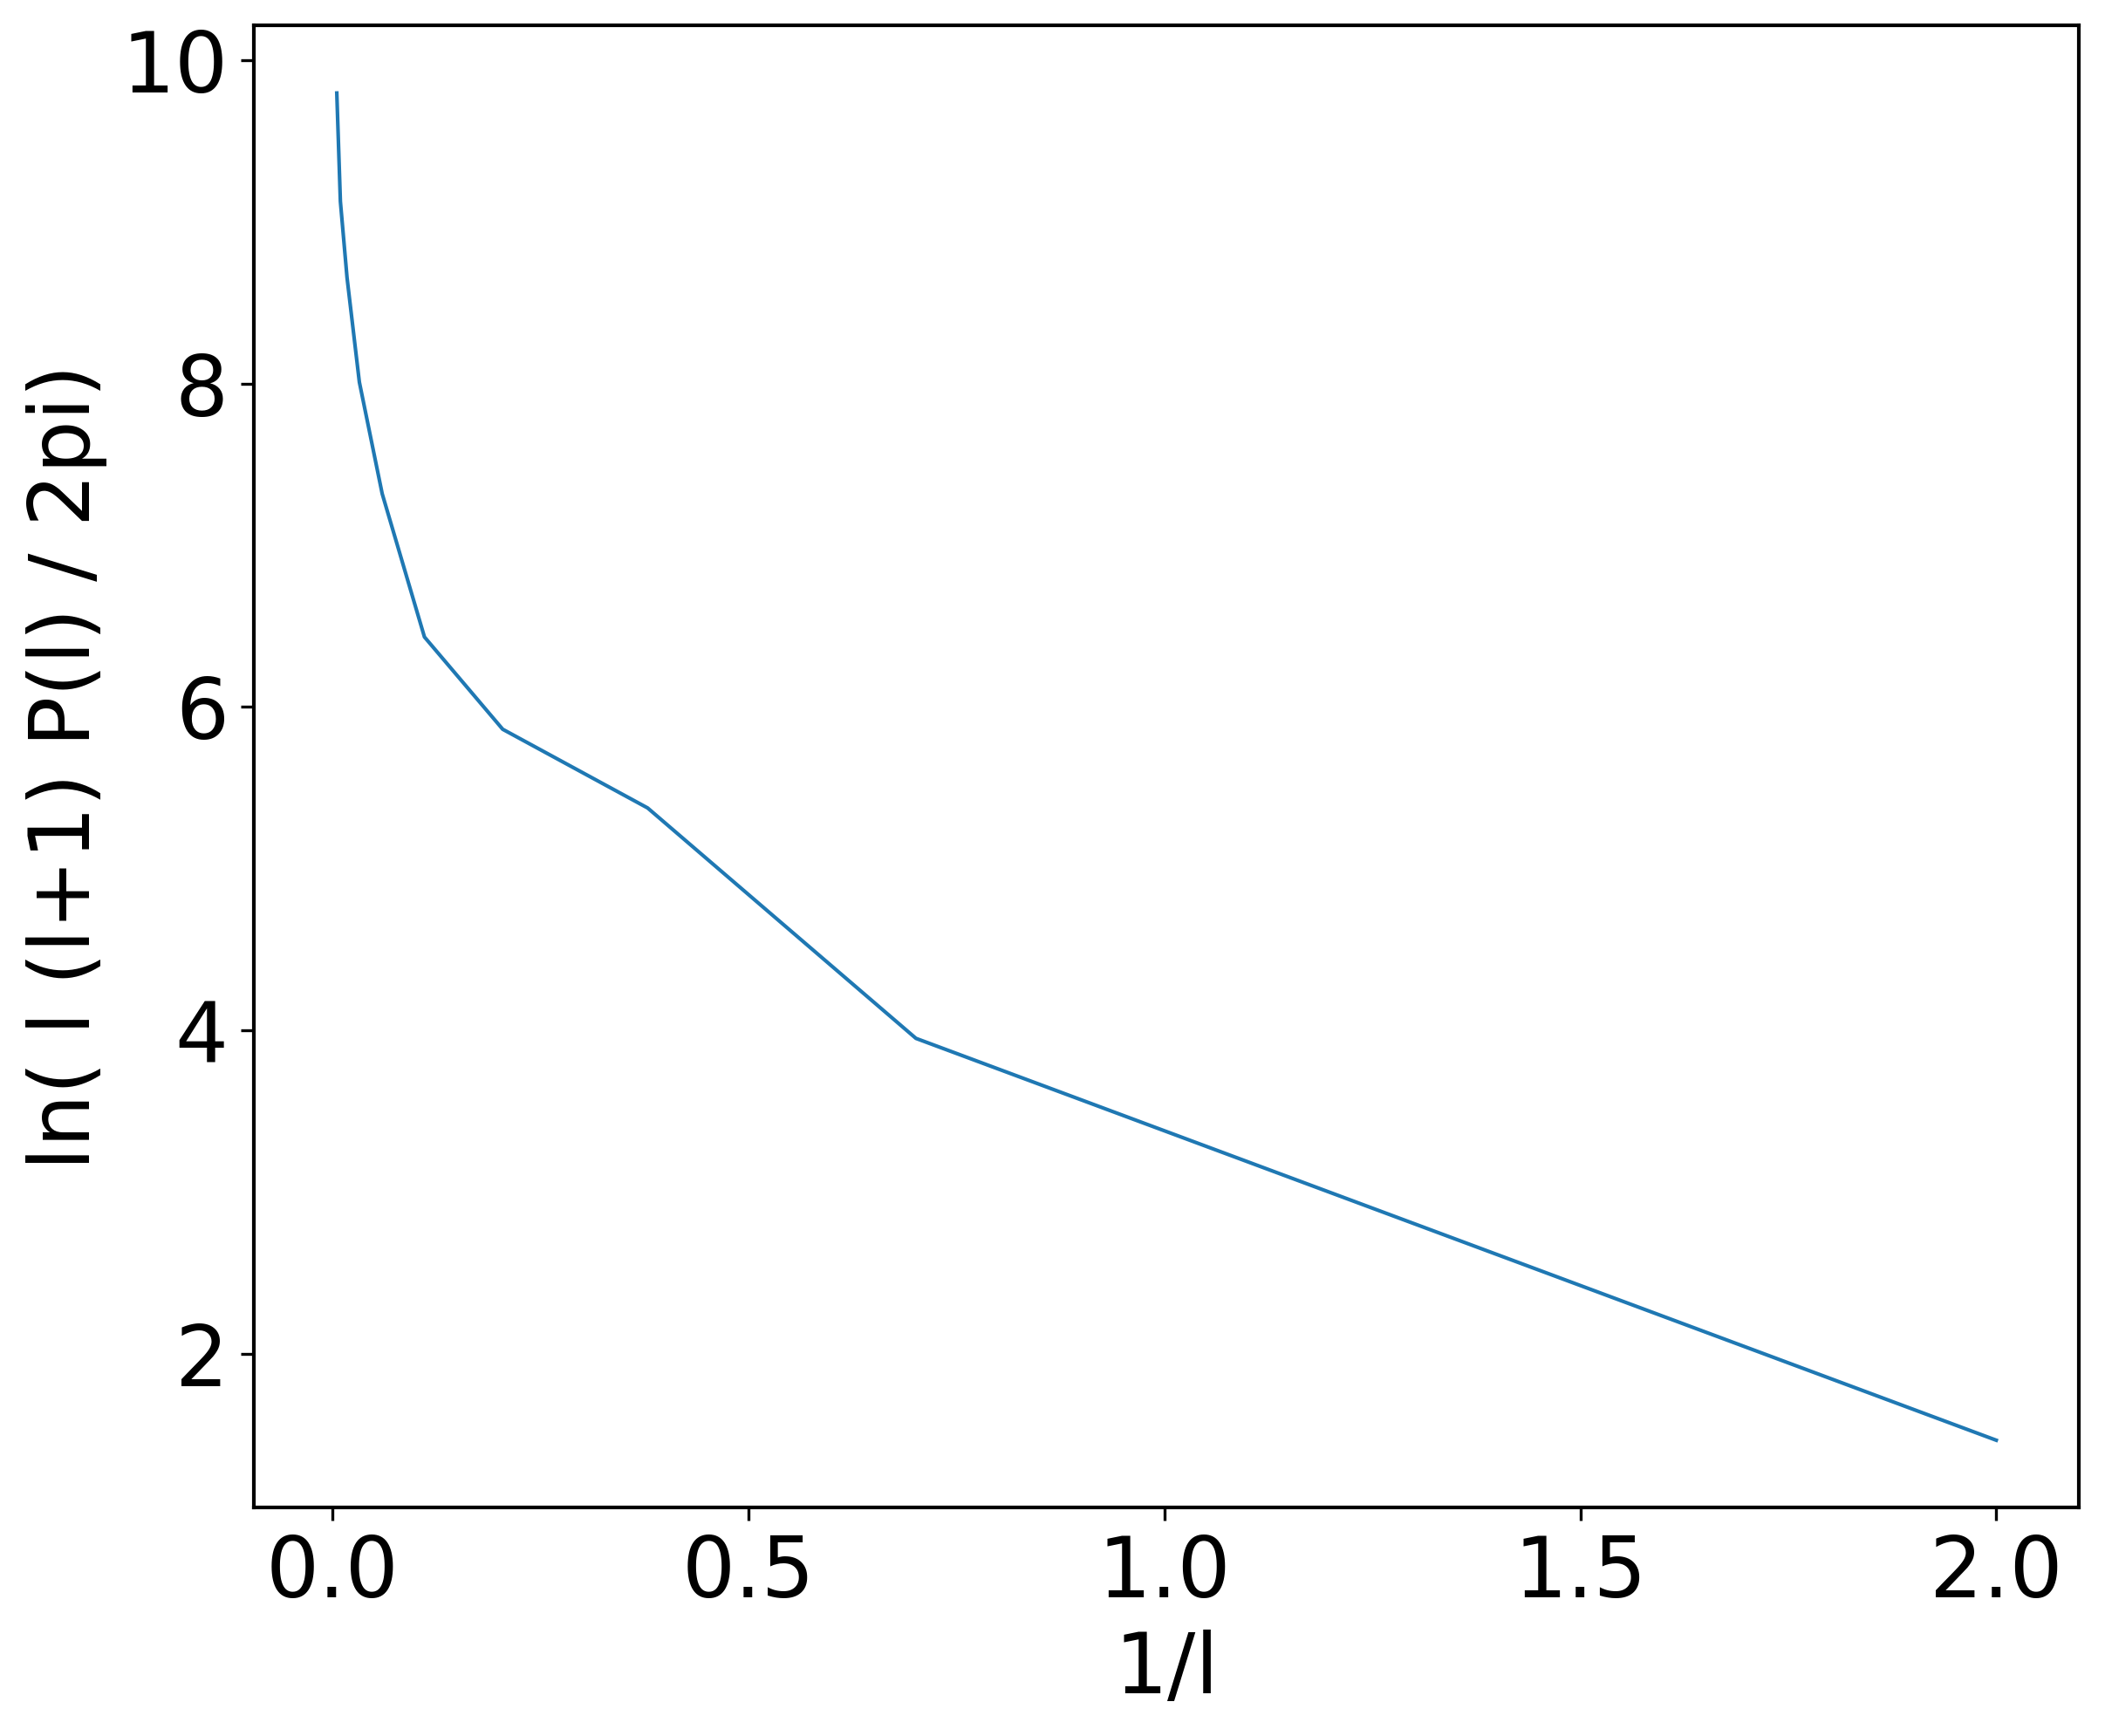

In [24]:
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#-----------------------------------------------------------------------------------
def get_power_spectrum(target, bins):
    '''
    get the power spectrum of a given image
    '''
    M, N = target.shape
    modulus = torch.fft(torch.cat((target.reshape(M,N,1), torch.zeros((M,N,1)).type(torch.FloatTensor) ), 2), 2)
    modulus = (modulus[:,:,0]**2 + modulus[:,:,1]**2)**0.5
    modulus = torch.cat(
        ( torch.cat(( modulus[M//2:, M//2:], modulus[M//2:, :M//2] ), 0),
          torch.cat(( modulus[:M//2, M//2:], modulus[:M//2, :M//2] ), 0)
        ),1)
    X = np.arange(0,M)
    Y = np.arange(0,N)
    Xgrid, Ygrid = np.meshgrid(X,Y)
    R = ((Xgrid-M/2)**2+(Ygrid-N/2)**2)**0.5
    R = torch.from_numpy(R).type(torch.FloatTensor)
    R_range = torch.logspace(0.0, np.log10(M/2), bins).type(torch.FloatTensor)
    R_range = torch.cat((torch.tensor([0]).type(torch.FloatTensor), R_range))
    power_spectrum = torch.zeros(len(R_range)-1).type(torch.FloatTensor)
    for i in range(len(R_range)-1):
        select = (R >= R_range[i]) * (R<R_range[i+1])
        power_spectrum[i] = modulus[select].mean()
    return power_spectrum, R_range

#-----------------------------------------------------------------------------------
# load an initial guess
image = np.load("image_initial.npy")[0,:,:] 
power_spectrum, R_range = get_power_spectrum(torch.from_numpy(image),10)

l = (R_range[1:]+R_range[:-1])/2.
plt.plot(1./l, np.log(power_spectrum*l*(l+1)/(2.*np.pi)))
plt.ylabel("ln( l (l+1) P(l) / 2pi)")
plt.xlabel("1/l")
print(power_spectrum)
